In [119]:
#Hyper Parameter
look_back = 3
epochs = 100
batch_size = 2
verbose = 2

In [120]:
# Ref https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/
# LSTM for Regression with Time Steps
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [121]:
import plotly.graph_objects as go #pip install plotly
import mplfinance as mpf #pip install mplfinance
import matplotlib
import pandas as pd
from datetime import datetime
import yfinance as yf
from pandas_datareader import data as pdr
from matplotlib.pyplot import figure

import matplotlib.pyplot as plt
# from mpl_finance import candlestick_ohlc
from mplfinance.original_flavor import candlestick_ohlc


In [122]:
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
# dataframe = read_csv('airline-passengers2.csv', usecols=[1], encoding ='latin1', engine='c') #python')
# dataframe = pdr.get_data_yahoo("SPY", start="2019-01-01", end="2020-01-31")
dataframe = pdr.get_data_yahoo("MSFT", start="2019-01-01", end="2020-01-31")

print(dataframe.head())

                  High         Low        Open       Close      Volume  \
Date                                                                     
2019-01-02  101.750000   98.940002   99.550003  101.120003  35329300.0   
2019-01-03  100.190002   97.199997  100.099998   97.400002  42579100.0   
2019-01-04  102.510002   98.930000   99.720001  101.930000  44060600.0   
2019-01-07  103.269997  100.980003  101.639999  102.059998  35656100.0   
2019-01-08  103.970001  101.709999  103.040001  102.800003  31514400.0   

             Adj Close  
Date                    
2019-01-02   99.646614  
2019-01-03   95.980820  
2019-01-04  100.444817  
2019-01-07  100.572922  
2019-01-08  101.302139  


In [123]:
#temp compromise
dataframe = dataframe[["High"]]
print(dataframe.head())

                  High
Date                  
2019-01-02  101.750000
2019-01-03  100.190002
2019-01-04  102.510002
2019-01-07  103.269997
2019-01-08  103.970001


In [124]:
dataset = dataframe.values
print(type(dataset))
print(dataset.shape)
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

<class 'numpy.ndarray'>
(273, 1)


In [125]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1, col=0):#default col = "High"
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):#less one? not necessary
        a = dataset[i:(i+look_back), :] #col] #if all use : instead col
        dataX.append(a)
        dataY.append(dataset[i + look_back, col])
    return numpy.array(dataX), numpy.array(dataY)

In [126]:
# reshape into X=t and Y=t+1
#(..)

print("before create_dataset")
print(train.shape)
print(test.shape)
# print(test[-5:])
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
print("\nafter create_dataset")
print(type(trainX),len(trainX))
print(trainX.shape)
# print(testX[-4:])
print(type(trainY),len(trainY))
print(trainY.shape)
# print(testY[-1:])

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
print("\nafter reshape")
print(type(trainX),len(trainX))
print(trainX.shape)
# print(trainX[-1:])
print(type(testX),len(testX))
print(testX.shape)

before create_dataset
(182, 1)
(91, 1)

after create_dataset
<class 'numpy.ndarray'> 178
(178, 3, 1)
<class 'numpy.ndarray'> 178
(178,)

after reshape
<class 'numpy.ndarray'> 178
(178, 3, 1)
<class 'numpy.ndarray'> 87
(87, 3, 1)


In [127]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
#(..)
model.fit(trainX, trainY, epochs=epochs, batch_size=batch_size, verbose=verbose)

Epoch 1/100
 - 0s - loss: 0.0820
Epoch 2/100
 - 0s - loss: 0.0178
Epoch 3/100
 - 0s - loss: 0.0116
Epoch 4/100
 - 0s - loss: 0.0085
Epoch 5/100
 - 0s - loss: 0.0056
Epoch 6/100
 - 0s - loss: 0.0035
Epoch 7/100
 - 0s - loss: 0.0021
Epoch 8/100
 - 0s - loss: 0.0013
Epoch 9/100
 - 0s - loss: 9.1255e-04
Epoch 10/100
 - 0s - loss: 7.8617e-04
Epoch 11/100
 - 0s - loss: 7.6370e-04
Epoch 12/100
 - 0s - loss: 7.4820e-04
Epoch 13/100
 - 0s - loss: 7.4328e-04
Epoch 14/100
 - 0s - loss: 7.3543e-04
Epoch 15/100
 - 0s - loss: 7.7570e-04
Epoch 16/100
 - 0s - loss: 7.4248e-04
Epoch 17/100
 - 0s - loss: 7.3801e-04
Epoch 18/100
 - 0s - loss: 7.1806e-04
Epoch 19/100
 - 0s - loss: 7.1832e-04
Epoch 20/100
 - 0s - loss: 7.6071e-04
Epoch 21/100
 - 0s - loss: 7.3379e-04
Epoch 22/100
 - 0s - loss: 7.1608e-04
Epoch 23/100
 - 0s - loss: 7.1143e-04
Epoch 24/100
 - 0s - loss: 7.1081e-04
Epoch 25/100
 - 0s - loss: 7.5315e-04
Epoch 26/100
 - 0s - loss: 7.1932e-04
Epoch 27/100
 - 0s - loss: 7.3073e-04
Epoch 28/100
 -

In [128]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [129]:
print(type(trainPredict),trainPredict.shape)
print(trainPredict[:5])
# print(trainPredict[-5:])
print(type(trainY),trainY.shape)
print(trainY[:1])

<class 'numpy.ndarray'> (178, 1)
[[0.03104685]
 [0.03715293]
 [0.05326516]
 [0.06328295]
 [0.06567358]]
<class 'numpy.ndarray'> (178,)
[0.04170048]


In [130]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [131]:
print(type(trainPredict),trainPredict.shape)
print(trainPredict[:5])
# print(trainPredict[-5:])

print(type(trainY),trainY.shape)
# print(trainY[:1])

<class 'numpy.ndarray'> (178, 1)
[[102.48312]
 [102.93411]
 [104.12417]
 [104.86408]
 [105.04065]]
<class 'numpy.ndarray'> (1, 178)
[[103.26999859 103.96999765 104.87999996 103.75000096 103.44000163
  102.87000541 105.050003   106.26000239 106.62999762 107.90000171
  107.09999774 107.04000185 107.00000165 107.8799972  106.47999908
  104.9700026  106.37999418 105.21999724 104.1000005  105.80000451
  107.27000079 107.00000165 105.58999247 105.78000001 106.58000397
  107.13999794 107.78000111 107.29000529 108.30000369 108.66000547
  107.9400019  109.48000513 111.19999604 112.17999649 113.23999734
  112.36000178 112.87999555 113.02000065 113.24999959 112.38999973
  112.66000767 111.55000437 110.71000021 112.9499937  113.98999885
  114.99999725 115.19999824 117.25000179 117.61000357 118.44000548
  118.74999601 120.82000406 119.59000017 118.01000555 118.70999581
  118.20999774 117.58000562 118.31999608 119.10999779 119.48000183
  120.43000433 120.23000334 120.23000334 120.0200001  119.539997

In [132]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

Train Score: 1.73 RMSE
Test Score: 4.08 RMSE


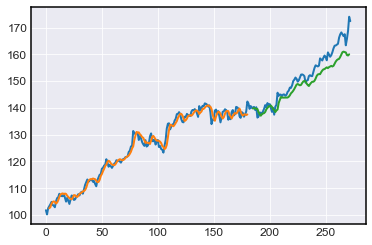

In [133]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [134]:
# The YHat has one day delay compared with Y, that's the reason for previous bad performance
def evaluateY(Y, YHat):
    total = len(Y[0])
    
    count = 0
    for i in range(1, total-1):
#         print(i)
#         print(YHat[i] - YHat[i-1],Y[0][i] - Y[0][i-1])
        if (YHat[i][0] - YHat[i-1][0]) * (Y[0][i] - Y[0][i-1]) > 0:
            count += 1
#         print(i,count)
    print("Trend prediction performance: {}%".format(count * 100.0 / total))


In [160]:
# import numpy as np
# x = np.array([1, 2, 4, 7, 0])
# print(np.diff(x))
# # print( np.diff(x, n=2) )
# # print( np.diff(x, n=3) )

[ 1  2  3 -7]
[  1   1 -10]
[  0 -11]


In [169]:
trend_testY = numpy.diff(testY[0])
print(type(trend_testY), trend_testY.shape)
print(trend_testY[:5])
trend_testY = numpy.where(trend_testY >0,1, 0)
#df # trend_testY = trend_testY.apply(lambda x: 1 if x > 0 else 0)
print(trend_testY[:5])

<class 'numpy.ndarray'> (86,)
[ 0.18000529 -1.14000124  1.0300029  -3.88001041  0.38000628]
[1 0 1 0 1]


In [170]:
print( type( testPredict.flatten() ) )
trend_testP = numpy.diff(testPredict.flatten())
print(type(trend_testP),trend_testP.shape)
print(trend_testP[:5])
trend_testP = numpy.where(trend_testP >0, 1, 0)
print(trend_testP[:5])
#df # trend_testP = list(testY[0].apply(lambda x: 1 if x > 0 else 0)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'> (86,)
[ 0.15594482 -0.08992004 -0.23202515  0.02693176 -1.219162  ]
[1 0 0 1 0]


In [ ]:
#(..)Result

In [186]:
from sklearn.metrics import accuracy_score
print( accuracy_score(trend_testY, trend_testP, normalize = True) )
# print( accuracy_score(trend_testY, trend_testP , normalize=False) )

0.47674418604651164


In [187]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(trend_testY, trend_testP, average='binary') #, average='macro')


(0.576271186440678, 0.6296296296296297, 0.6017699115044248, None)

In [188]:
from sklearn.metrics import precision_score
# >>> y_true = [0, 1, 2, 0, 1, 2]
# >>> y_pred = [0, 2, 1, 0, 0, 1]
# >>> precision_score(y_true, y_pred, average='macro')
precision_score(trend_testY, trend_testP, average='binary')

0.576271186440678

In [189]:
from sklearn.metrics import recall_score
# >>> y_true = [0, 1, 2, 0, 1, 2]
# >>> y_pred = [0, 2, 1, 0, 0, 1]
# >>> recall_score(y_true, y_pred, average='macro')
recall_score(trend_testY, trend_testP, average='binary')

0.6296296296296297

In [190]:
from sklearn.metrics import f1_score
f1_score(trend_testY, trend_testP ) #, average='weighted')

0.6017699115044248

In [135]:
print(testY.shape)

print(testY[0][2]) #.head())

print(testPredict.shape)    
print(testPredict[2][0]) #.head())

(1, 87)
139.21999833809434
(87, 1)
139.81166


Test Set Only:
Trend prediction performance: 45.97701149425287%


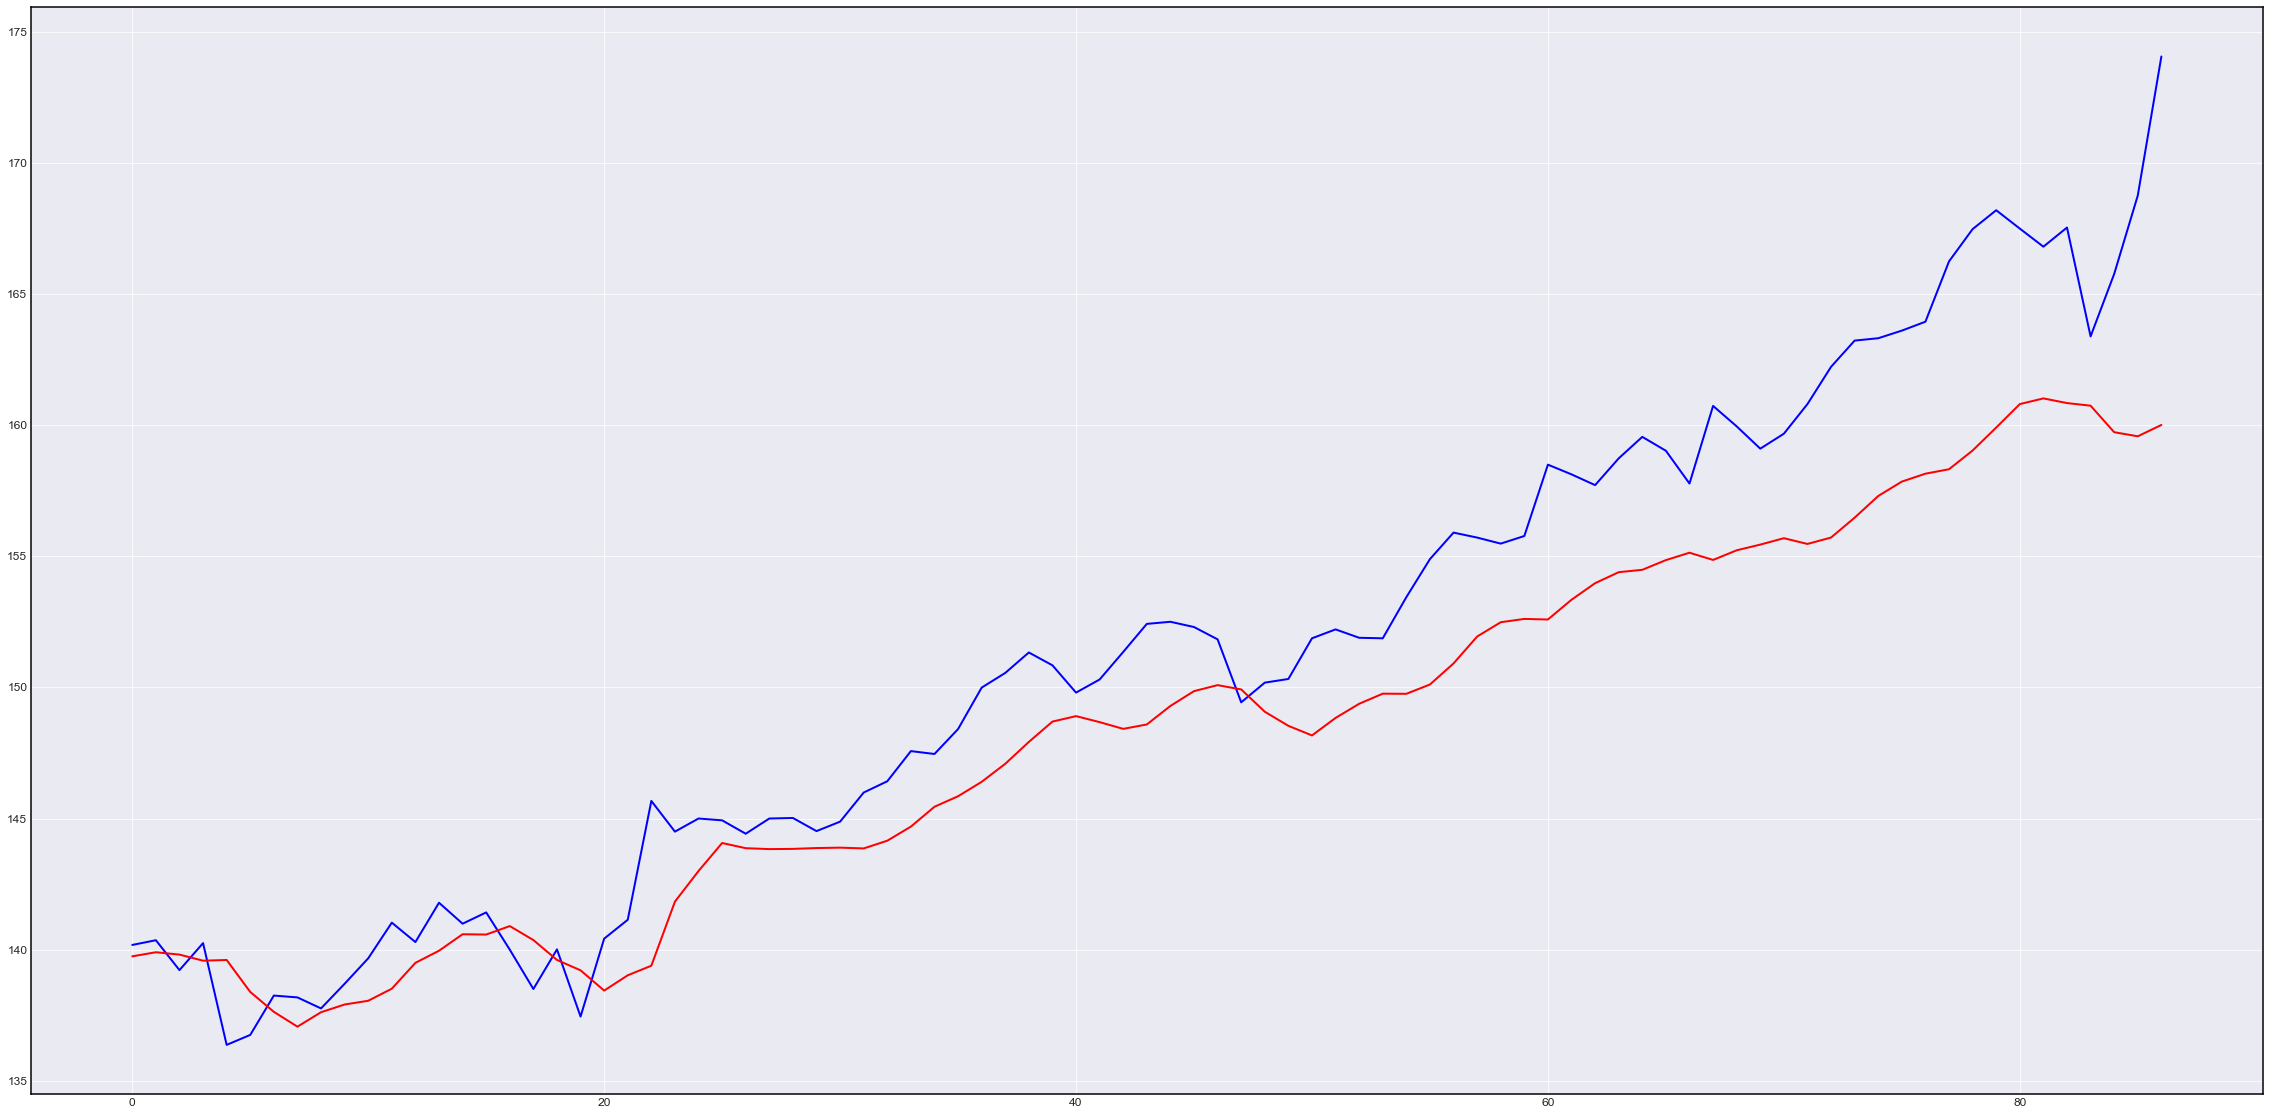

In [139]:
# print('Overall:')
print('Test Set Only:')
evaluateY(testY, testPredict)    

# print('Test Set Only:')
# evaluateY(testY[train_size:], testPredict[train_size:])  

plt.figure(figsize=(40,20))
plt.plot(testY[0],c='b')
plt.plot(testPredict, c = 'r')
plt.show()
